In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
folder = '../../../measurements/free_running_spectra/12_16_2019/'
file = 'SCRN0012.TXT'
file2 = 'SCRN0013.TXT'

In [24]:
total = folder + file
total2 = folder + file2

In [25]:
amp = np.loadtxt(total) 
amp2 = np.loadtxt(total2)

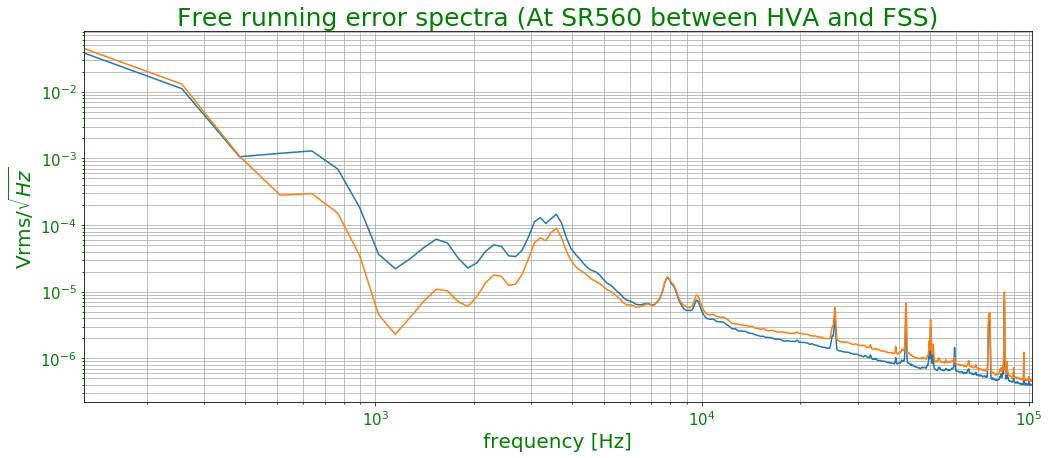

In [36]:
fig = plt.figure(figsize=(17,15))
plt.subplot(211)
plt.loglog(amp[:,0],amp[:,1])
plt.loglog(amp2[:,0],amp2[:,1])
ax = plt.gca()
plt.ylabel('Vrms/$\sqrt{Hz}$',fontsize=20, color='green')
plt.xlabel('frequency [Hz]', fontsize=20, color='green')
plt.grid('True', which='both')
plt.grid('True')
ax.tick_params(which='both', width=1, colors='green')
ax.tick_params(which='minor', length=2)
ax.tick_params(labelsize=15)
ax.yaxis.offsetText.set_fontsize(15)
plt.xlim([amp[:,0][0],amp[:,0][-1]])
plt.title('Free running error spectra (At SR560 between HVA and FSS)', FontSize=25, color='green')
ax.set_xscale('log')

In [17]:
#Converting from dB to transimpedence
inj_resistor = 10e3
transimp = np.array([inj_resistor*10**(i/20) for i in amp[:,:,1]])

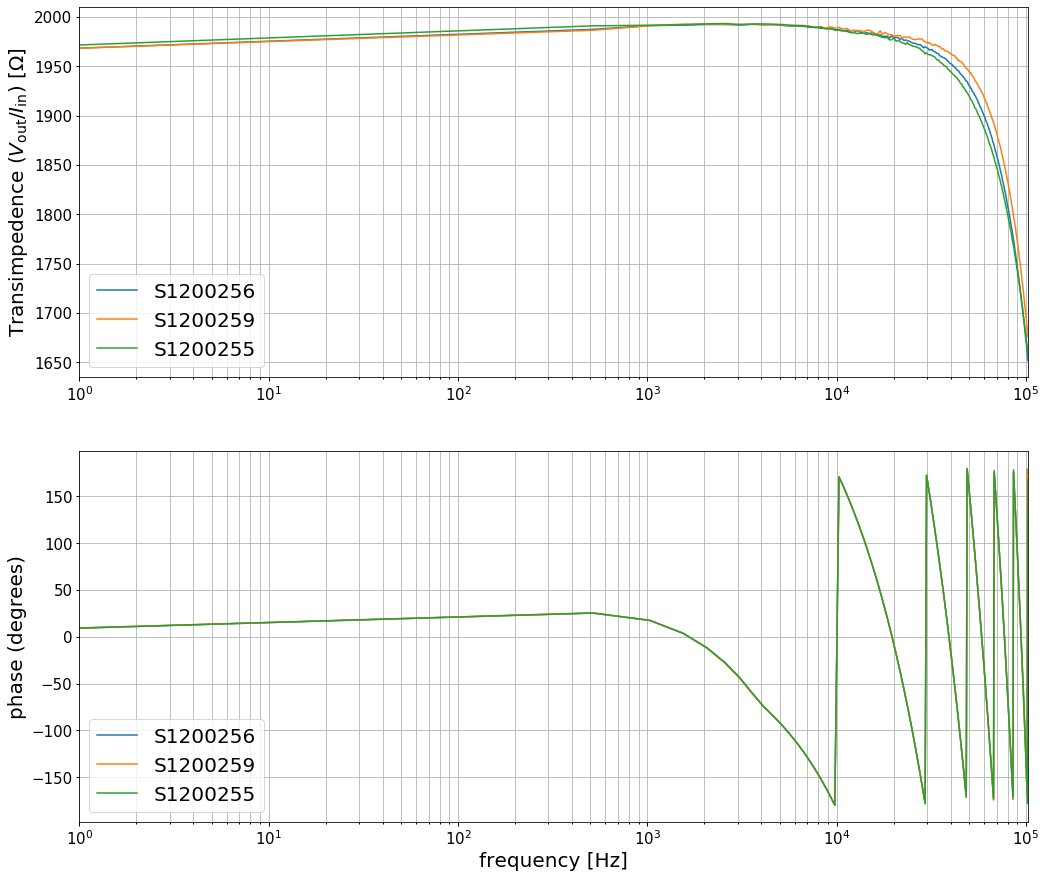

In [18]:
fig = plt.figure(figsize=(17,15))
plt.subplot(211)
for i in range(len(PD_labels)):
    plt.plot(amp[i,:,0],transimp[i],label='S1200'+PD_labels[i])
ax = plt.gca()
plt.ylabel('Transimpedence ($V_\mathrm{out}$/$I_\mathrm{in}$) [$\Omega$]',fontsize=20)
plt.grid('True', which='both')
plt.grid('True')
ax.tick_params(which='both', width=1)
ax.tick_params(which='minor', length=2)
ax.tick_params(labelsize=15)
ax.yaxis.offsetText.set_fontsize(15)
plt.xlim([amp[0][:,0][0],amp[0][:,0][-1]])
ax.set_xscale('log')
plt.legend(prop={'size':20})
plt.subplot(212)
for i in range(len(PD_labels)):
    plt.plot(phase[i,:,0],phase[i,:,1],label='S1200'+PD_labels[i])
ax = plt.gca()
plt.ylabel('phase (degrees)',fontsize=20)
plt.grid('True', which='both')
plt.grid('True')
ax.tick_params(which='both', width=1)
ax.tick_params(which='minor', length=2)
ax.tick_params(labelsize=15)
ax.yaxis.offsetText.set_fontsize(15)
plt.xlabel('frequency [Hz]',fontsize=20)
plt.xlim([phase[0][:,0][0],phase[0][:,0][-1]])
ax.set_xscale('log')
plt.legend(loc=3,prop={'size':20})
plt.savefig(folder+'DC_transimpedence.png',dpi=300,bbox_inches='tight')
